In [1]:
import numpy as np  #importing numpy
import matplotlib.pyplot as plt
import pandas as pd       #importing pandas 
import seaborn as sns    # importing seaborn lib
from sklearn.model_selection import train_test_split
import warnings
import requests
warnings.filterwarnings("ignore")

In [2]:
# importing and reading the csv raw data
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv', index_col=False)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#Snapshot
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Data Exploration

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* From the info we came to know that "Age", "Cabin" and "Embarked" has missing values

In [6]:
# Check for the missing vales
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* From the info we came to know that "Age" has 177, "Cabin" has 687 and "Embarked" has 2 missing values

In [7]:
data.shape
print("Number of rows :" ,len(data))
print("Number of columns :" ,len(data.columns))

Number of rows : 891
Number of columns : 12


In [8]:
data['Age'].mean()

29.69911764705882

In [9]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* From this we came to know that "Age" column is replaced with mean value

In [11]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
data['Embarked'].mode()

0    S
dtype: object

In [13]:
data['Embarked']= data['Embarked'].fillna('S')
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


* We have filled with value "S" for "Embarked" column

In [14]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
data.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,37.048118,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.866958,0.402174,0.380435,20.662183
3,439.154786,0.242363,26.403259,0.615071,0.393075,13.675550


* From this we can see :
* Pclass 1 has highest 'Fare' mean
* Pclass 3 has highest 'SibSp' mean 
* Pclass 1 has highest 'Age' mean

In [16]:
data.groupby('Sex').sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,135343,233,678,8860.053235,218,204,13966.6628
male,262043,109,1379,17601.860588,248,136,14727.2865


* From this we can say that 'female' survival has the highest

In [17]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

* We can see that male count is 577 and female=314

In [18]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

* Survival = 1
* Non survival = 0

In [19]:
# Create Family size
data['Family']=data['SibSp'] + data['Parch'] + 1
data.head(13)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,2


In [20]:
data = data.drop(columns='Cabin',axis=1)
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1


* Dropping the 'Cabin' column

In [21]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Family         0
dtype: int64

### Data Analysis

#### Statistical measure of data

In [22]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


#### Data Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

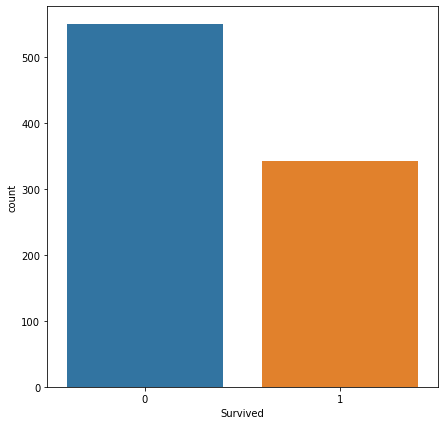

In [23]:
#countplot to check'Survived' column
plt.figure(figsize=(7,7)) 
sns.countplot('Survived',data=data )

In [24]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

* Below plot graph shows the male and female counts  

<AxesSubplot:xlabel='Sex', ylabel='count'>

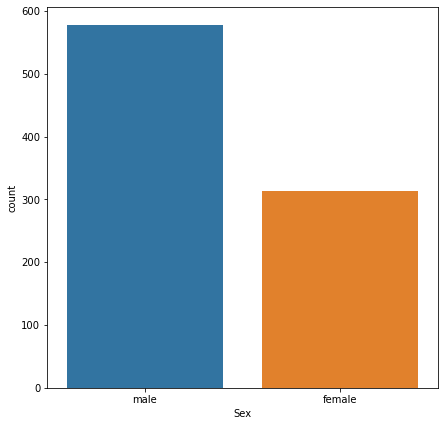

In [25]:
#countplot to check'Sex' column
plt.figure(figsize=(7,7)) 
sns.countplot('Sex',data=data )

In [26]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

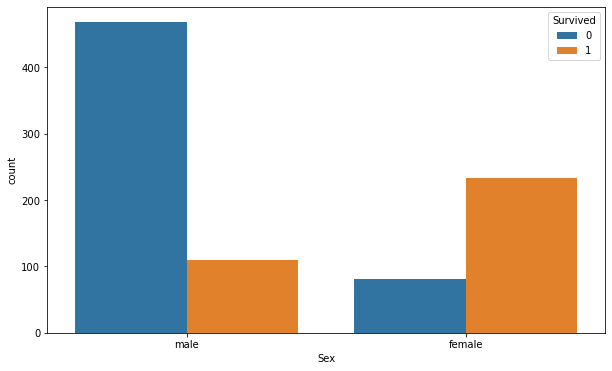

In [27]:

plt.figure(figsize=[10,6])
sns.countplot('Sex',hue='Survived',data=data)      #Survival = 1,Non survival = 0

In [28]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

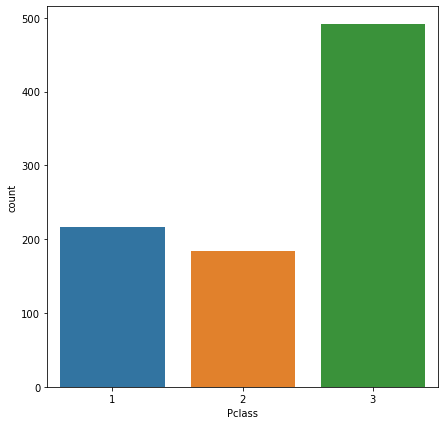

In [29]:
#countplot to check'Pclass' column
plt.figure(figsize=(7,7)) 
sns.countplot('Pclass',data=data ) 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

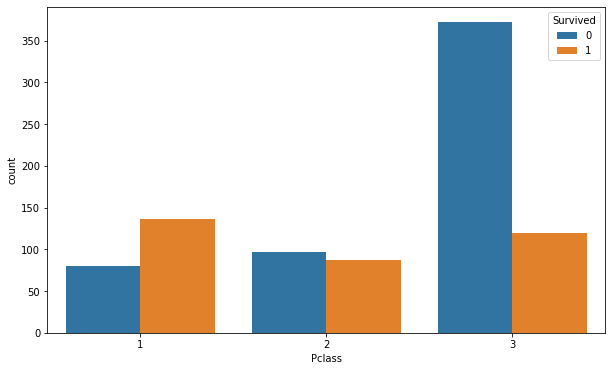

In [30]:
plt.figure(figsize=[10,6])
sns.countplot('Pclass',hue='Survived',data=data)  

In [31]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

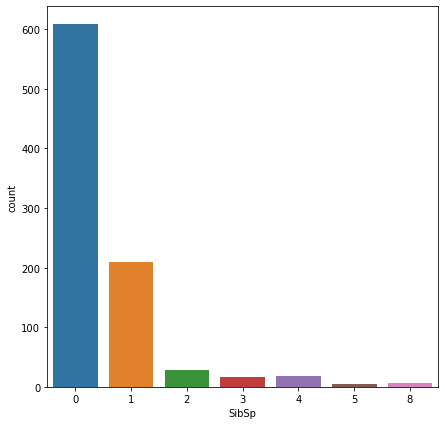

In [32]:
#countplot to check'SibSp' column
plt.figure(figsize=(7,7)) 
sns.countplot('SibSp',data=data )

<AxesSubplot:xlabel='SibSp', ylabel='count'>

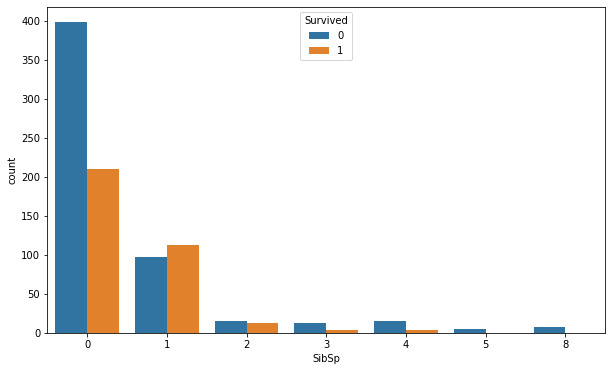

In [33]:
plt.figure(figsize=[10,6])
sns.countplot('SibSp',hue='Survived',data=data)  

In [34]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

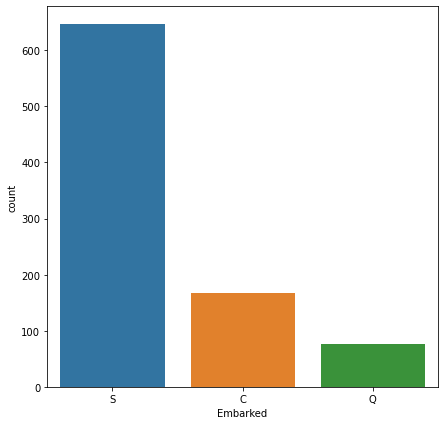

In [35]:
#countplot to check'Embarked' column
plt.figure(figsize=(7,7)) 
sns.countplot('Embarked',data=data )

<AxesSubplot:xlabel='Embarked', ylabel='count'>

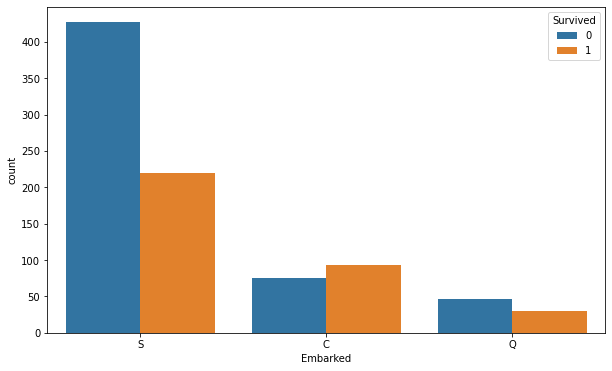

In [36]:
plt.figure(figsize=[10,6])
sns.countplot('Embarked',hue='Survived',data=data) 

In [37]:
data['Family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

<AxesSubplot:xlabel='Family', ylabel='count'>

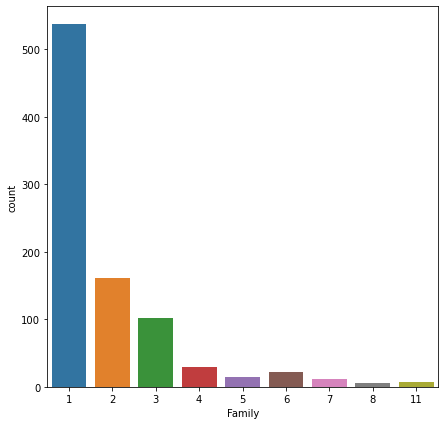

In [38]:
#countplot to check'Family' column
plt.figure(figsize=(7,7)) 
sns.countplot('Family',data=data )

<AxesSubplot:xlabel='Family', ylabel='count'>

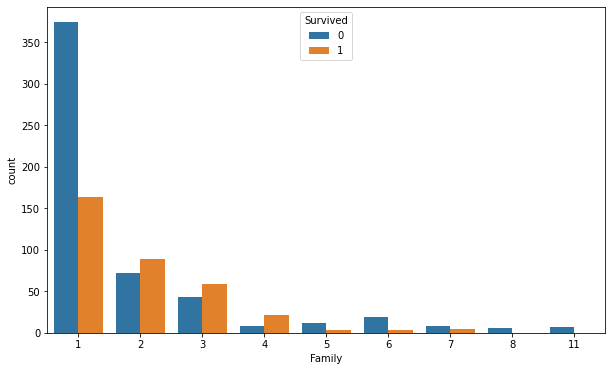

In [39]:
plt.figure(figsize=[10,6])
sns.countplot('Family',hue='Survived',data=data) 

In [40]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [41]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

### Converting into categorical columns

In [42]:
data.replace({'Sex':{"male":0,"female":1},'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace =True)


In [43]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1


#### Seperating features and Target

In [44]:
X=data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y=data['Survived']

In [45]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Family
0         3    0  22.000000      1      0   7.2500         0       2
1         1    1  38.000000      1      0  71.2833         1       2
2         3    1  26.000000      0      0   7.9250         0       1
3         1    1  35.000000      1      0  53.1000         0       2
4         3    0  35.000000      0      0   8.0500         0       1
..      ...  ...        ...    ...    ...      ...       ...     ...
886       2    0  27.000000      0      0  13.0000         0       1
887       1    1  19.000000      0      0  30.0000         0       1
888       3    1  29.699118      1      2  23.4500         0       4
889       1    0  26.000000      0      0  30.0000         1       1
890       3    0  32.000000      0      0   7.7500         2       1

[891 rows x 8 columns]


* Dropping columns which are not required to predict Survival

In [46]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


* Storing in different variable to predict the survival

#### Spliting the data into Training and Test data

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=2,test_size=0.2)

In [48]:
print(X_train.shape ,X_test.shape, X.shape)

(712, 8) (179, 8) (891, 8)


### Model Training

#### Logistic Regression 


In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [50]:
model.fit(X_train,Y_train)

LogisticRegression()

* Training the Logistic Regression model with training data

#### Model Evaluation

##### Accuracy Score

###### Checking the Accuracy:

In [51]:
X_train_prediction = model.predict(X_train)

In [52]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [53]:
from sklearn.metrics import accuracy_score
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)


Accuracy score of training data :  0.8089887640449438


* The output comes out to be 0.8089887640449438, which is pretty decent

In [54]:
X_test_prediction = model.predict(X_test)

In [55]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [56]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7821229050279329


* The output came out to be 0.7821229050279329, which was very close to our test data prediction(Y_test).Thus our model is quite accurate as per the data we received.

### RandomForestClassifier 

In [57]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=100)

In [58]:
model1.fit(X_train,Y_train)

RandomForestClassifier()

In [59]:
random_train_prediction = model1.predict(X_train)

In [60]:
print(random_train_prediction)

[0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 1 1 0 0 

#### Accuracy Score

In [61]:
random_training_data_accuracy = accuracy_score(Y_train, random_train_prediction)
print('Accuracy score of random training data : ', random_training_data_accuracy)


Accuracy score of random training data :  0.9859550561797753


* The output comes out to be 0.9859550561797753, which is pretty decent

In [62]:
random_test_prediction = model1.predict(X_test)

In [63]:
print(random_test_prediction)

[1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1
 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0
 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1]


In [64]:
random_test_data_accuracy = accuracy_score(Y_test, random_test_prediction)
print('Accuracy score of random test data : ', random_test_data_accuracy)

Accuracy score of random test data :  0.8044692737430168


* The output came out to be 0.8044692737430168, which was very close to our test data prediction(Y_test).Thus our model is quite accurate as per the data we received.

In [65]:

print(training_data_accuracy)
print(test_data_accuracy)
print(random_training_data_accuracy)
print(random_test_data_accuracy)


0.8089887640449438
0.7821229050279329
0.9859550561797753
0.8044692737430168


* Thus we can conclude that our model is performing well

In [66]:
# To create Dataframe of predicted value with particular respective index
result1 = pd.DataFrame()  #target data
result1['Prediction of Trained data']=X_train_prediction
result1

,Prediction of Trained data
0,0
1,1
2,0
3,0
4,0
...,...
707,1
708,0
709,0
710,1


In [67]:
# To create Dataframe of predicted value with particular respective index
result2 = pd.DataFrame()  #target data
result2['Prediction of Test data']=X_test_prediction
result2

,Prediction of Test data
0,0
1,0
2,1
3,0
4,0
...,...
174,0
175,0
176,0
177,0


In [68]:
data_row = pd.concat([result1, result2], ignore_index=True)
data_row

,Prediction of Trained data,Prediction of Test data
0,0.0,NaN
1,1.0,NaN
2,0.0,NaN
3,0.0,NaN
4,0.0,NaN
...,...,...
886,NaN,0.0
887,NaN,0.0
888,NaN,0.0
889,NaN,0.0


In [69]:
#save the dataframe into csv file
data_row.to_csv('Titanic_case_study.csv')